In [36]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
from scipy.stats import ttest_ind, pearsonr

In [2]:
# Load the dataset
dataset = pd.read_csv('restaurant_data.csv')

In [3]:
# Display the first few rows of the dataset
print(dataset.head())

           Name  Location   Cuisine  Rating  Seating Capacity  \
0  Restaurant 0     Rural  Japanese     4.0                38   
1  Restaurant 1  Downtown   Mexican     3.2                76   
2  Restaurant 2     Rural   Italian     4.7                48   
3  Restaurant 3     Rural   Italian     4.4                34   
4  Restaurant 4  Downtown  Japanese     4.9                88   

   Average Meal Price  Marketing Budget  Social Media Followers  \
0               73.98              2224                   23406   
1               28.11              4416                   42741   
2               48.29              2796                   37285   
3               51.55              1167                   15214   
4               75.98              3639                   40171   

   Chef Experience Years  Number of Reviews  Avg Review Length  \
0                     13                185         161.924906   
1                      8                533         148.759717   
2       

In [4]:
# Display summary statistics
print(dataset.describe())

            Rating  Seating Capacity  Average Meal Price  Marketing Budget  \
count  8368.000000       8368.000000         8368.000000       8368.000000   
mean      4.008258         60.212835           47.896659       3218.254900   
std       0.581474         17.399488           14.336767       1824.896053   
min       3.000000         30.000000           25.000000        604.000000   
25%       3.500000         45.000000           35.490000       1889.000000   
50%       4.000000         60.000000           45.535000       2846.500000   
75%       4.500000         75.000000           60.300000       4008.500000   
max       5.000000         90.000000           76.000000       9978.000000   

       Social Media Followers  Chef Experience Years  Number of Reviews  \
count             8368.000000            8368.000000        8368.000000   
mean             36190.621773              10.051984         523.010397   
std              18630.153330               5.516606         277.215127 

In [5]:
# Display information about the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8368 entries, 0 to 8367
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    8368 non-null   object 
 1   Location                8368 non-null   object 
 2   Cuisine                 8368 non-null   object 
 3   Rating                  8368 non-null   float64
 4   Seating Capacity        8368 non-null   int64  
 5   Average Meal Price      8368 non-null   float64
 6   Marketing Budget        8368 non-null   int64  
 7   Social Media Followers  8368 non-null   int64  
 8   Chef Experience Years   8368 non-null   int64  
 9   Number of Reviews       8368 non-null   int64  
 10  Avg Review Length       8368 non-null   float64
 11  Ambience Score          8368 non-null   float64
 12  Service Quality Score   8368 non-null   float64
 13  Parking Availability    8368 non-null   object 
 14  Weekend Reservations    8368 non-null   

In [6]:
# Check for missing values
print(dataset.isnull().sum())

Name                      0
Location                  0
Cuisine                   0
Rating                    0
Seating Capacity          0
Average Meal Price        0
Marketing Budget          0
Social Media Followers    0
Chef Experience Years     0
Number of Reviews         0
Avg Review Length         0
Ambience Score            0
Service Quality Score     0
Parking Availability      0
Weekend Reservations      0
Weekday Reservations      0
Revenue                   0
dtype: int64


In [7]:
# Drop the 'Name' column as it is not numeric and not useful for the analysis
dataset = dataset.drop(columns=['Name'])

In [8]:
# One-hot encode categorical variables
dataset = pd.get_dummies(dataset, columns=['Location', 'Cuisine', 'Parking Availability'], drop_first=True)

In [9]:
# Normalize numerical columns
scaler = StandardScaler()
numerical_cols = ['Seating Capacity', 'Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Chef Experience Years', 'Number of Reviews', 'Avg Review Length', 'Ambience Score', 'Service Quality Score', 'Weekend Reservations', 'Weekday Reservations']
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [10]:
# Split the dataset into training and testing sets
X = dataset.drop('Revenue', axis=1)
y = dataset['Revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Print the shape and size of the training and test data
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {X_test.shape}, Test labels shape: {y_test.shape}')

Training data shape: (6694, 20), Training labels shape: (6694,)
Test data shape: (1674, 20), Test labels shape: (1674,)


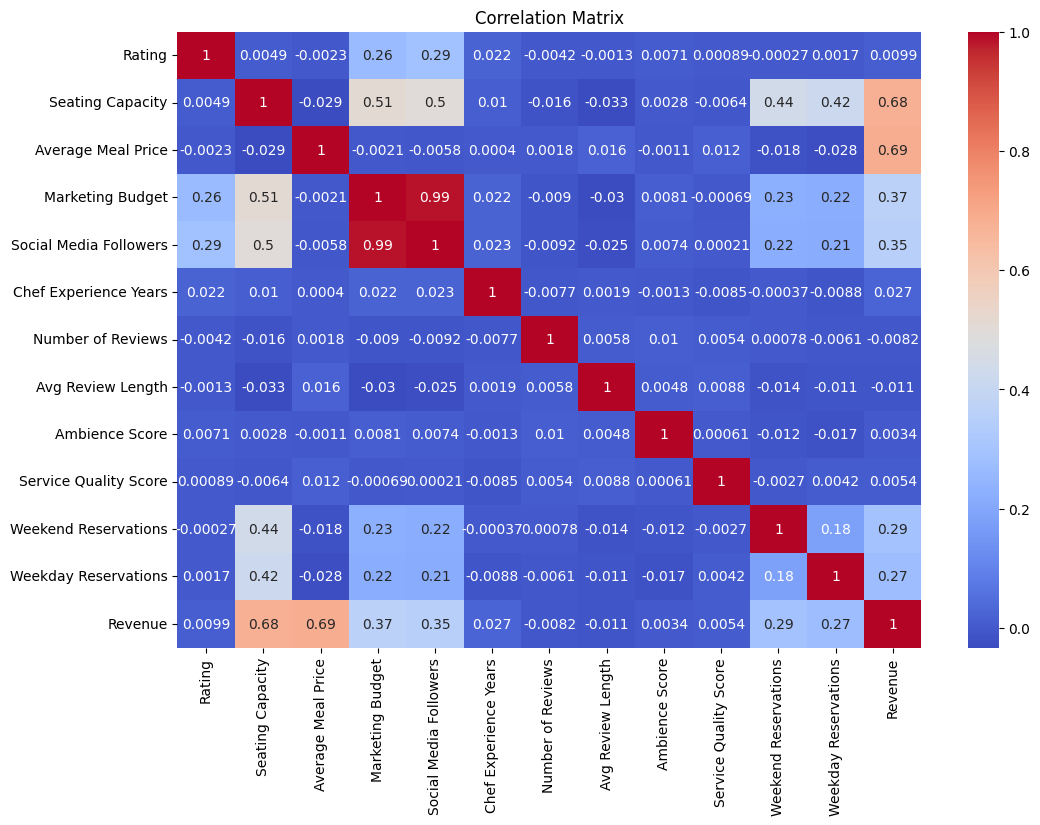

In [12]:
# Select only numeric columns for correlation calculation
numeric_cols = dataset.select_dtypes(include=[np.number])

# Calculate Pearson correlation
correlation_matrix = numeric_cols.corr()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Define independent and dependent variables
X = dataset.drop('Revenue', axis=1)
y = dataset['Revenue']

# Fit the multiple regression model
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Predict and calculate R-squared value
y_pred = regression_model.predict(X_test)
r_squared = regression_model.score(X_test, y_test)
print(f'R-squared value: {r_squared}')

R-squared value: 0.9554413593451657


In [14]:
# Example of checking the columns
print(dataset.columns)

Index(['Rating', 'Seating Capacity', 'Average Meal Price', 'Marketing Budget',
       'Social Media Followers', 'Chef Experience Years', 'Number of Reviews',
       'Avg Review Length', 'Ambience Score', 'Service Quality Score',
       'Weekend Reservations', 'Weekday Reservations', 'Revenue',
       'Location_Rural', 'Location_Suburban', 'Cuisine_French',
       'Cuisine_Indian', 'Cuisine_Italian', 'Cuisine_Japanese',
       'Cuisine_Mexican', 'Parking Availability_Yes'],
      dtype='object')


In [15]:
# ANOVA for Location
anova_model_location = ols('Revenue ~ Q("Location_Rural") + Q("Location_Suburban")', data=dataset).fit()
anova_table_location = sm.stats.anova_lm(anova_model_location, typ=2)
print(anova_table_location)

# ANOVA for Cuisine
anova_model_cuisine = ols('Revenue ~ Q("Cuisine_French") + Q("Cuisine_Indian") + Q("Cuisine_Italian") + Q("Cuisine_Japanese") + Q("Cuisine_Mexican")', data=dataset).fit()
anova_table_cuisine = sm.stats.anova_lm(anova_model_cuisine, typ=2)
print(anova_table_cuisine)

                              sum_sq      df            F         PR(>F)
Q("Location_Rural")     2.420085e+14     1.0  5686.891246   0.000000e+00
Q("Location_Suburban")  6.754181e+13     1.0  1587.146114  5.835889e-318
Residual                3.559768e+14  8365.0          NaN            NaN
                             sum_sq      df            F         PR(>F)
Q("Cuisine_French")    4.640765e+13     1.0  1170.270615  3.586368e-240
Q("Cuisine_Indian")    3.249506e+12     1.0    81.943426   1.717799e-19
Q("Cuisine_Italian")   1.155145e+13     1.0   291.295178   3.151968e-64
Q("Cuisine_Japanese")  9.594757e+13     1.0  2419.528293   0.000000e+00
Q("Cuisine_Mexican")   1.328725e+13     1.0   335.067193   2.030558e-73
Residual               3.315992e+14  8362.0          NaN            NaN


In [16]:
# Hypothesis testing for Location (Rural vs Non-Rural)
group_rural = dataset[dataset['Location_Rural'] == 1]['Revenue']
group_non_rural = dataset[dataset['Location_Rural'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_rural, group_non_rural)
print(f'T-test for Rural Location: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis testing for Location (Suburban vs Non-Suburban)
group_suburban = dataset[dataset['Location_Suburban'] == 1]['Revenue']
group_non_suburban = dataset[dataset['Location_Suburban'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_suburban, group_non_suburban)
print(f'T-test for Suburban Location: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis testing for Cuisine (French vs Non-French)
group_french = dataset[dataset['Cuisine_French'] == 1]['Revenue']
group_non_french = dataset[dataset['Cuisine_French'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_french, group_non_french)
print(f'T-test for French Cuisine: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis testing for Cuisine (Indian vs Non-Indian)
group_indian = dataset[dataset['Cuisine_Indian'] == 1]['Revenue']
group_non_indian = dataset[dataset['Cuisine_Indian'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_indian, group_non_indian)
print(f'T-test for Indian Cuisine: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis testing for Cuisine (Italian vs Non-Italian)
group_italian = dataset[dataset['Cuisine_Italian'] == 1]['Revenue']
group_non_italian = dataset[dataset['Cuisine_Italian'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_italian, group_non_italian)
print(f'T-test for Italian Cuisine: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis testing for Cuisine (Japanese vs Non-Japanese)
group_japanese = dataset[dataset['Cuisine_Japanese'] == 1]['Revenue']
group_non_japanese = dataset[dataset['Cuisine_Japanese'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_japanese, group_non_japanese)
print(f'T-test for Japanese Cuisine: t-statistic = {t_stat}, p-value = {p_value}')

# Hypothesis testing for Cuisine (Mexican vs Non-Mexican)
group_mexican = dataset[dataset['Cuisine_Mexican'] == 1]['Revenue']
group_non_mexican = dataset[dataset['Cuisine_Mexican'] == 0]['Revenue']
t_stat, p_value = ttest_ind(group_mexican, group_non_mexican)
print(f'T-test for Mexican Cuisine: t-statistic = {t_stat}, p-value = {p_value}')

T-test for Rural Location: t-statistic = -58.76264813764812, p-value = 0.0
T-test for Suburban Location: t-statistic = -2.179973633169137, p-value = 0.029287197834439255
T-test for French Cuisine: t-statistic = 26.576540504188365, p-value = 1.7874139685215055e-149
T-test for Indian Cuisine: t-statistic = -25.007899124425563, p-value = 3.567429522033874e-133
T-test for Italian Cuisine: t-statistic = 5.664838297955437, p-value = 1.5203755728215804e-08
T-test for Japanese Cuisine: t-statistic = 47.53570835972266, p-value = 0.0
T-test for Mexican Cuisine: t-statistic = -37.82991462587582, p-value = 3.0819228502142544e-289


In [42]:
# Hypothesis testing for continuous variables
continuous_vars = ['Average Meal Price', 'Marketing Budget', 'Social Media Followers', 'Service Quality Score']
for var in continuous_vars:
    correlation, p_value = pearsonr(dataset[var], dataset['Revenue'])
    print(f'Pearson correlation for {var}: correlation = {correlation}, p-value = {p_value}')

Pearson correlation for Average Meal Price: correlation = 0.6863646811017292, p-value = 0.0
Pearson correlation for Marketing Budget: correlation = 0.3653220450505688, p-value = 1.4028767226810876e-262
Pearson correlation for Social Media Followers: correlation = 0.3544661316274186, p-value = 2.9391273925758124e-246
Pearson correlation for Service Quality Score: correlation = 0.005375197687928376, p-value = 0.6229768060736998
